This will be a more complicated system of equations to solve with torchdiffeq

In [17]:
import torch
import matplotlib.pyplot as plt
from torchdiffeq import odeint

In [18]:
# Define the parameters for the Lorenz system
sigma = 10.0
rho = 28.0
beta = 8.0/3.0
gamma = 1.0

# initialize the x, y, z, and w values
y0 = torch.tensor([1.0, 1.0, 1.0, 1.0])

# get time span
t_set = torch.linspace(0, 50, steps = 10000)

In [19]:
class LorenzAttraction(torch.nn.Module):
    def forward(self, t, y):
        x, y, z, w = y[0], y[1], y[2], y[3]

        dx_dt = sigma * (y - x)
        dy_dt = x * (rho - z) - y
        dz_dt = x * y - beta * z
        dw_dt = - x * z - gamma * w

        return torch.tensor([dx_dt, dy_dt, dz_dt, dw_dt])

In [20]:
model = LorenzAttraction()
solution = odeint(model, y0, t_set)

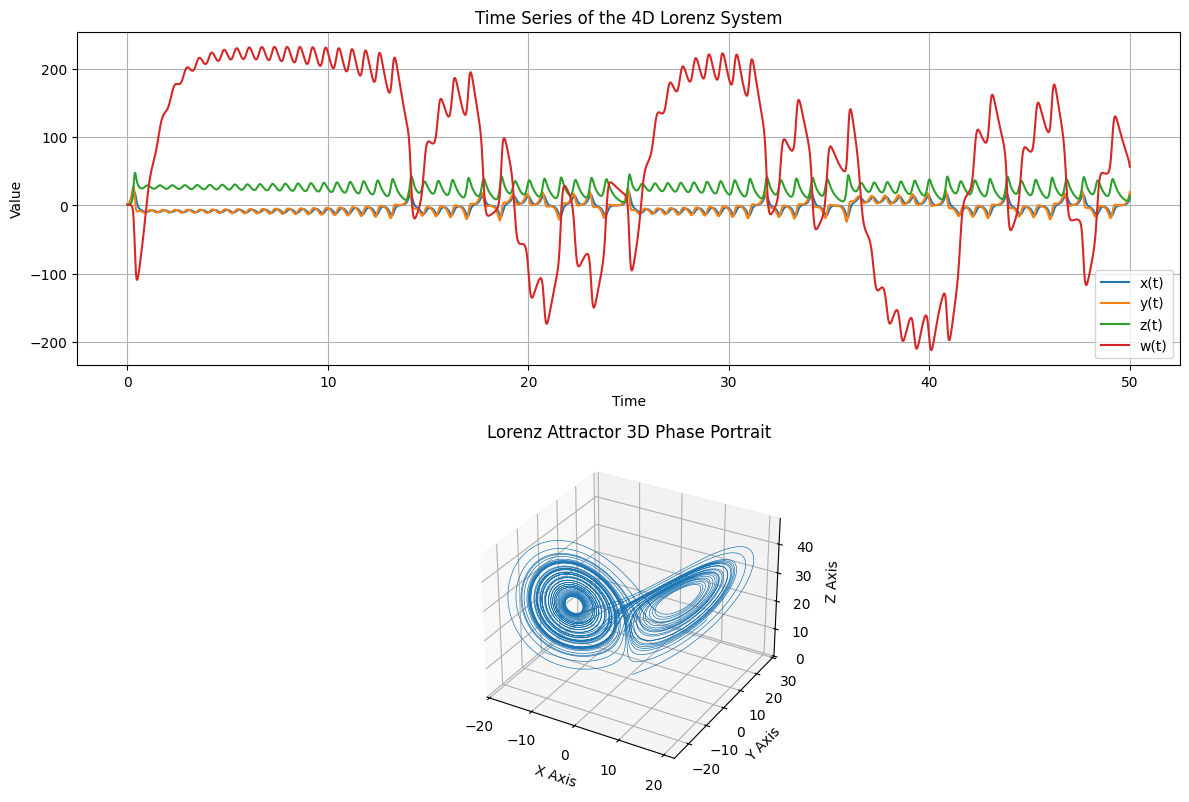

In [21]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(t_set.numpy(), solution.numpy()[:, 0], label='x(t)')
plt.plot(t_set.numpy(), solution.numpy()[:, 1], label='y(t)')
plt.plot(t_set.numpy(), solution.numpy()[:, 2], label='z(t)')
plt.plot(t_set.numpy(), solution.numpy()[:, 3], label='w(t)')
plt.title('Time Series of the 4D Lorenz System')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# 3D Phase Portrait (of the original x, y, z variables)
ax = plt.subplot(2, 1, 2, projection='3d')
x_sol, y_sol, z_sol = solution.numpy()[:, 0], solution.numpy()[:, 1], solution.numpy()[:, 2]
ax.plot(x_sol, y_sol, z_sol, lw=0.5)
ax.set_title('Lorenz Attractor 3D Phase Portrait')
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")

plt.tight_layout()
plt.show()
